# WINE QUALITY PREDICTION

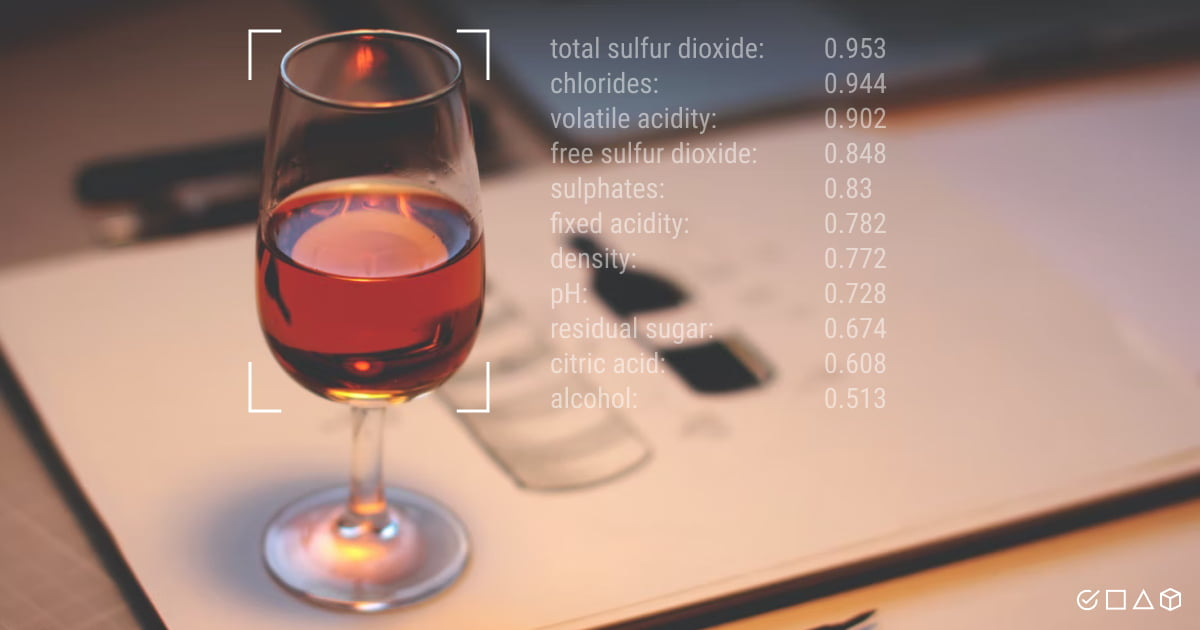

In [2]:
import matplotlib.pyplot as plt
from IPython.display import Image
Image(filename='wine.jpg',width=1000,height=10)

- **Wine is an alcoholic beverage produced through the fermentation of grape juice. It has been enjoyed by people for centuries and is valued for its diverse flavors, aromas, and complexities. Wine is produced in various regions worldwide, each with its own unique characteristics and styles.**

- **Predicting the quality of wine is essential for several reasons. Firstly, wine quality assessment helps both producers and consumers make informed decisions. For producers, understanding the quality of their wines allows them to maintain consistency, identify areas for improvement, and meet consumer preferences. For consumers, wine quality prediction assists in selecting wines that align with their preferences, ensuring a satisfactory experience.**

- **Additionally, wine quality prediction contributes to the overall improvement of the wine industry. By analyzing large datasets of wine characteristics and quality ratings, patterns and correlations can be identified. This knowledge can be used to refine winemaking techniques, optimize grape growing conditions, and enhance the overall quality of wines.**

- **Moreover, wine quality prediction has economic implications. Accurate assessments help establish market value, pricing strategies, and branding decisions. It enables consumers to make purchasing choices based on expected quality, leading to customer satisfaction and loyalty.**

In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

### Loading Dataset

In [4]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Feature Explanation

Following features are used to predict the wine's rating or quality which is a number from 0 to 10. The descriptions from the original paper are reproduced here for convenience.

- **Fixed Acidity** - Amount of tartaric acid in g/L, although more generally fixed acids in wine include malic, citric, and succinic acid as well.


- **Volatile Acidity** - Amount of acetic acid (vinegar) in g/L. More generally volatile acids may also include lactic, formic, butiric, and propionic acids. These acids are associated with spoilage in wine.


- **Citric Acid** - Amount of citric acid in g/L. Citric acid is normally present in small amounts in grapes but may be added to wine to increase acidity.


- **Residual Sugar** - Typically the amount of natural sugar in g/L remaining in the wine after fermentation completes. Some countries allow additional sugar to be added, but this practice has fallen out of favor with critics.


- **Chlorides** - Amount of sodium chloride in g/L.


- **Free Sulfur Dioxide** - Amount of sulfites available to react in mg/L. Sulfites (sulfur dioxide or  SO2) are often added to wine as a preservative, but some also occurs naturally.


- **Total Sulfur Dioxide** - Total amount of free and already reacted (bound) sulfites in mg/L.


- **Density** - Measured in g/ml.


- **pH** - Measurement of the acidity of the wine (lower pH is more acidic.)


- **Sulphates** - A different form of naturally occurring sulfur (SO4) that depends on the composition of the soil in which the grapes are grown.


- **Alcohol** - Percent alcohol by volume.

While the range in quality theoretically goes from 0 to 10, in practice the lowest quality value in this dataset is 3 and the highest is 8. 

### Understanding Dataset

In [5]:
# Dimension of dataset
df.shape

# number of rows = 1599
# number of columns = 12

(1599, 12)

In [6]:
# Verifying datatypes of the variables
df.info()

# All the columns are correctly defined as numerical variables. However, quality (Target variable) can be considered as a 
# categorical column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Statistical Summary of the data

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### DATA PREPROCESSING

In [9]:
# Checking the presence of null value

df.isnull().sum()
# no null/missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

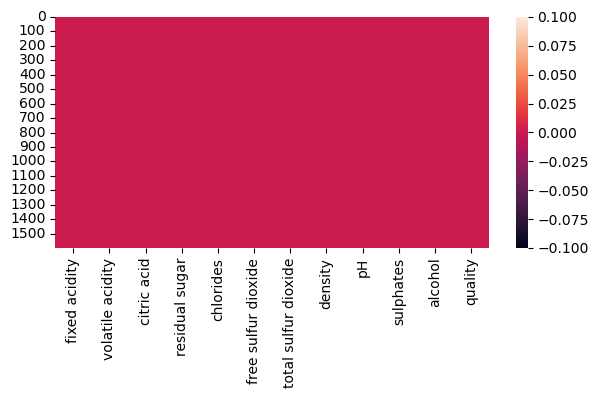

In [10]:
plt.figure(figsize=(7,3))
sns.heatmap(df.isnull())

##### Inference :
No null/missing values
___________

### Data Visualization

- ##### Distribution of Columns in the data (Univariate Analysis)

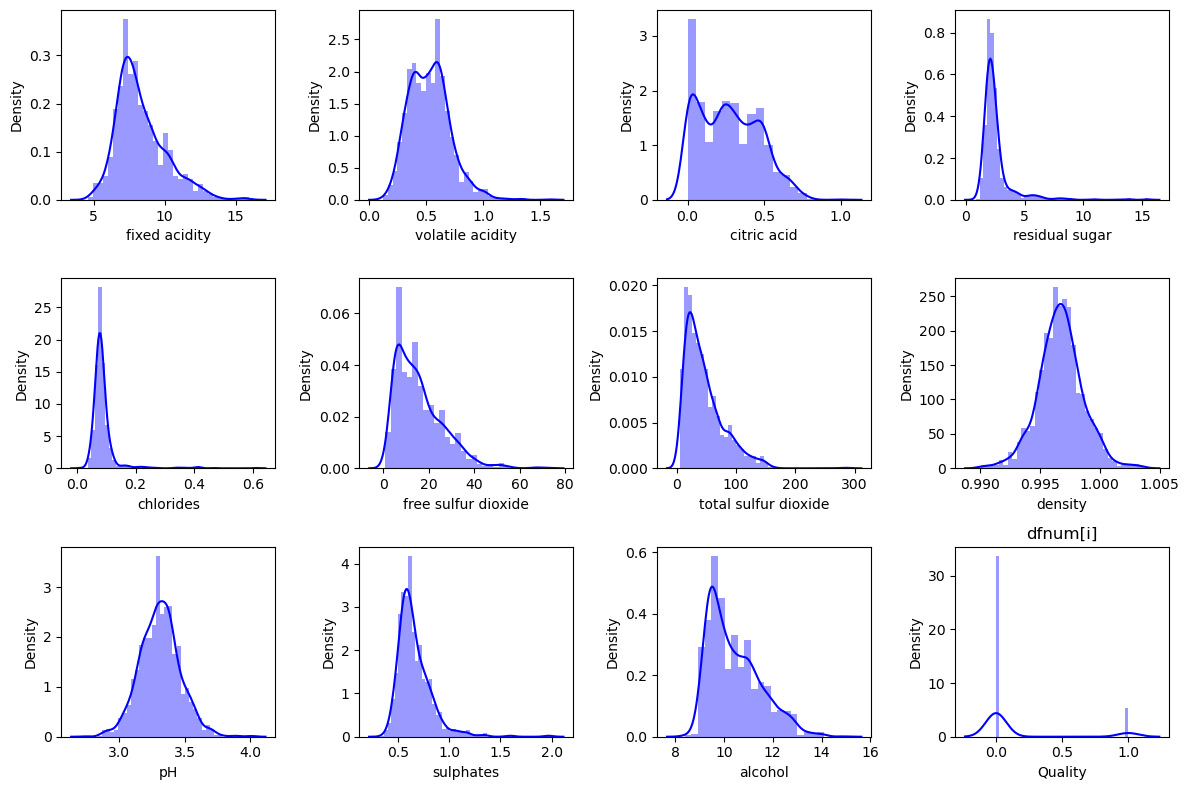

In [35]:
dfnum = df.select_dtypes(include=np.number)
fig,ax= plt.subplots(3,4,figsize=(12,8))
#colors = ['c']
for i,subplots in zip(dfnum ,ax.flatten()):
    sns.distplot(dfnum[i],ax=subplots, color='b')
    plt.title('dfnum[i]')
plt.tight_layout()


##### Inference :
Most of the variables are skewed(non normal distribution). As per above figures, 'residual sugar', 'chlorides', 'total sulfur dioxide' are some of the columns with huge positive skewness.
____________

- ##### Checking the presence of outliers through boxplots

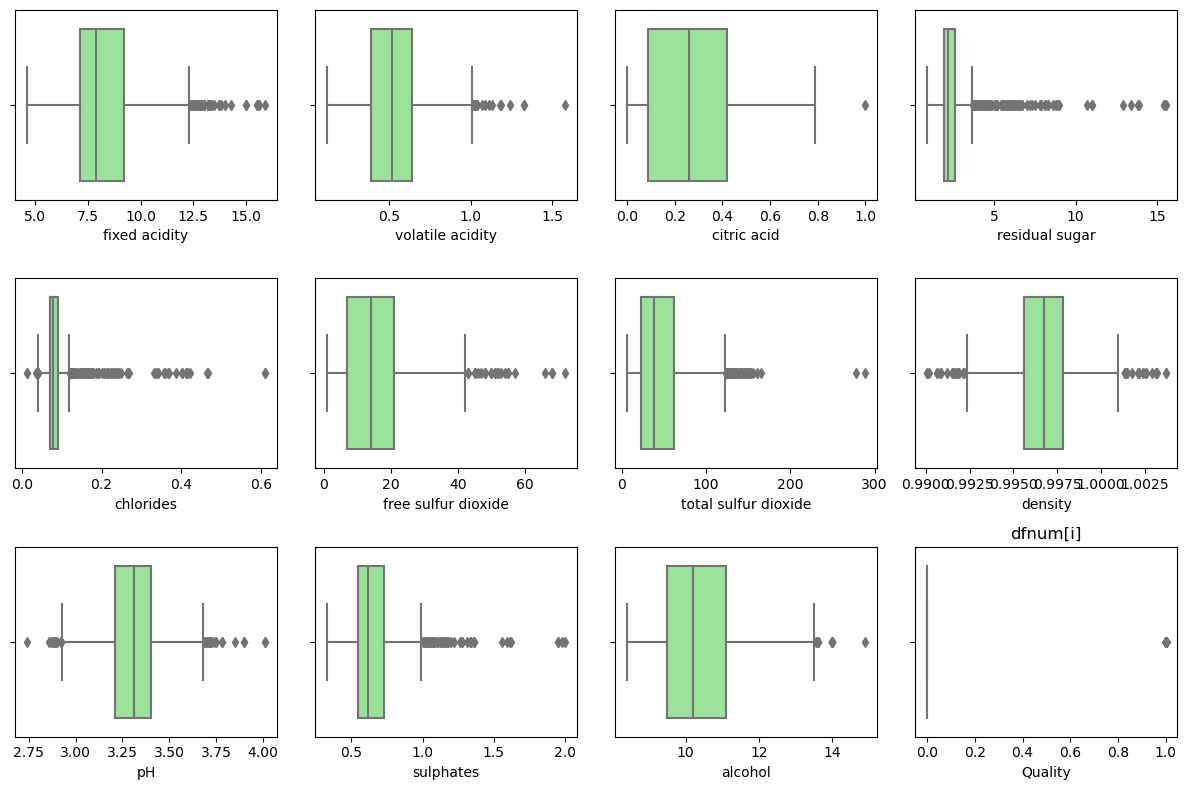

In [68]:
dfnum = df.select_dtypes(include=np.number)
fig,ax= plt.subplots(3,4,figsize=(12,8))

for i,subplots in zip(dfnum ,ax.flatten()):
    sns.boxplot(dfnum[i],ax=subplots, color='lightgreen')
    plt.title('dfnum[i]')
plt.tight_layout()


##### Inference :
All the variables have outliers.
________________

- ##### Checking correlation among variables

<AxesSubplot:>

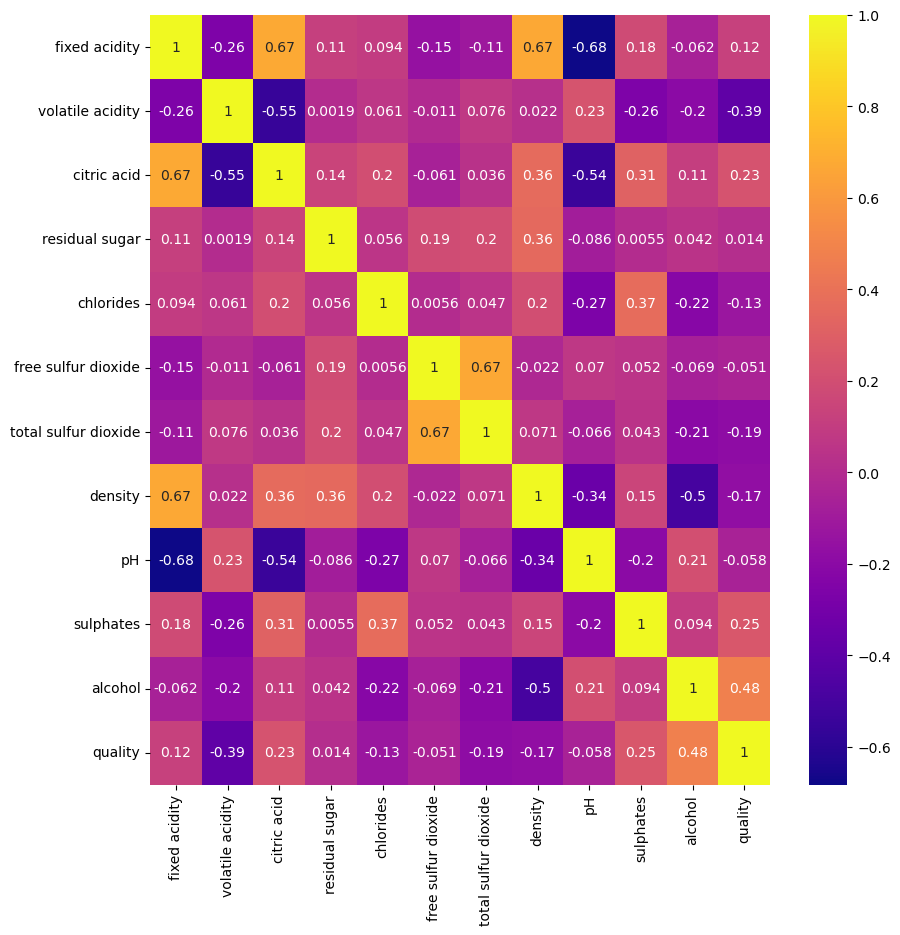

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='plasma')

##### Inference :
The above heatmap suggests that there are features which have moderate multicollinearity. For further investigation we can use **Variance_Inflation_Factor**.
___________________________________________________________________________________________________________________

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[]
for i in range(df.shape[1]):
    vif.append(variance_inflation_factor(df.values, i))
    
pd.DataFrame({'Variables': df.columns, 'VIF values':vif}).sort_values(by='VIF values')

,Variables,VIF values
11,Quality,1.513112
3,residual sugar,4.672888
5,free sulfur dioxide,6.442937
6,total sulfur dioxide,6.540177
4,chlorides,6.611200
2,citric acid,9.192314
1,volatile acidity,17.204640
9,sulphates,22.067624
0,fixed acidity,74.452433
10,alcohol,139.142714


##### Inference :
The variables with VIF > 10 can be considered as having high multicollinearity which can be dropped. However, we'll not drop any variable now. After applying suitable transformation we'll again check the VIF values. If the VIF values are still high after transformation, then we can drop the respective columns.
___________________________________________________________________________________________________________________________

### Setting up Target Variable
The output variable is the quality of wine as a score from 0 to 10. Instead of predicting this number we can divide the scores into two groups i.e., 'High' and 'Low'. The wine with a score less than 7 can be considered as 'Low' or poor quality and wine with a score 7 and above as 'High' or good. The High quality wine can be then denoted as 1 and 'Low' quality as 0.

In [14]:
df['Quality'] = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [15]:
df.drop('quality', axis=1, inplace=True)

#### BIVARIATE ANALYSIS

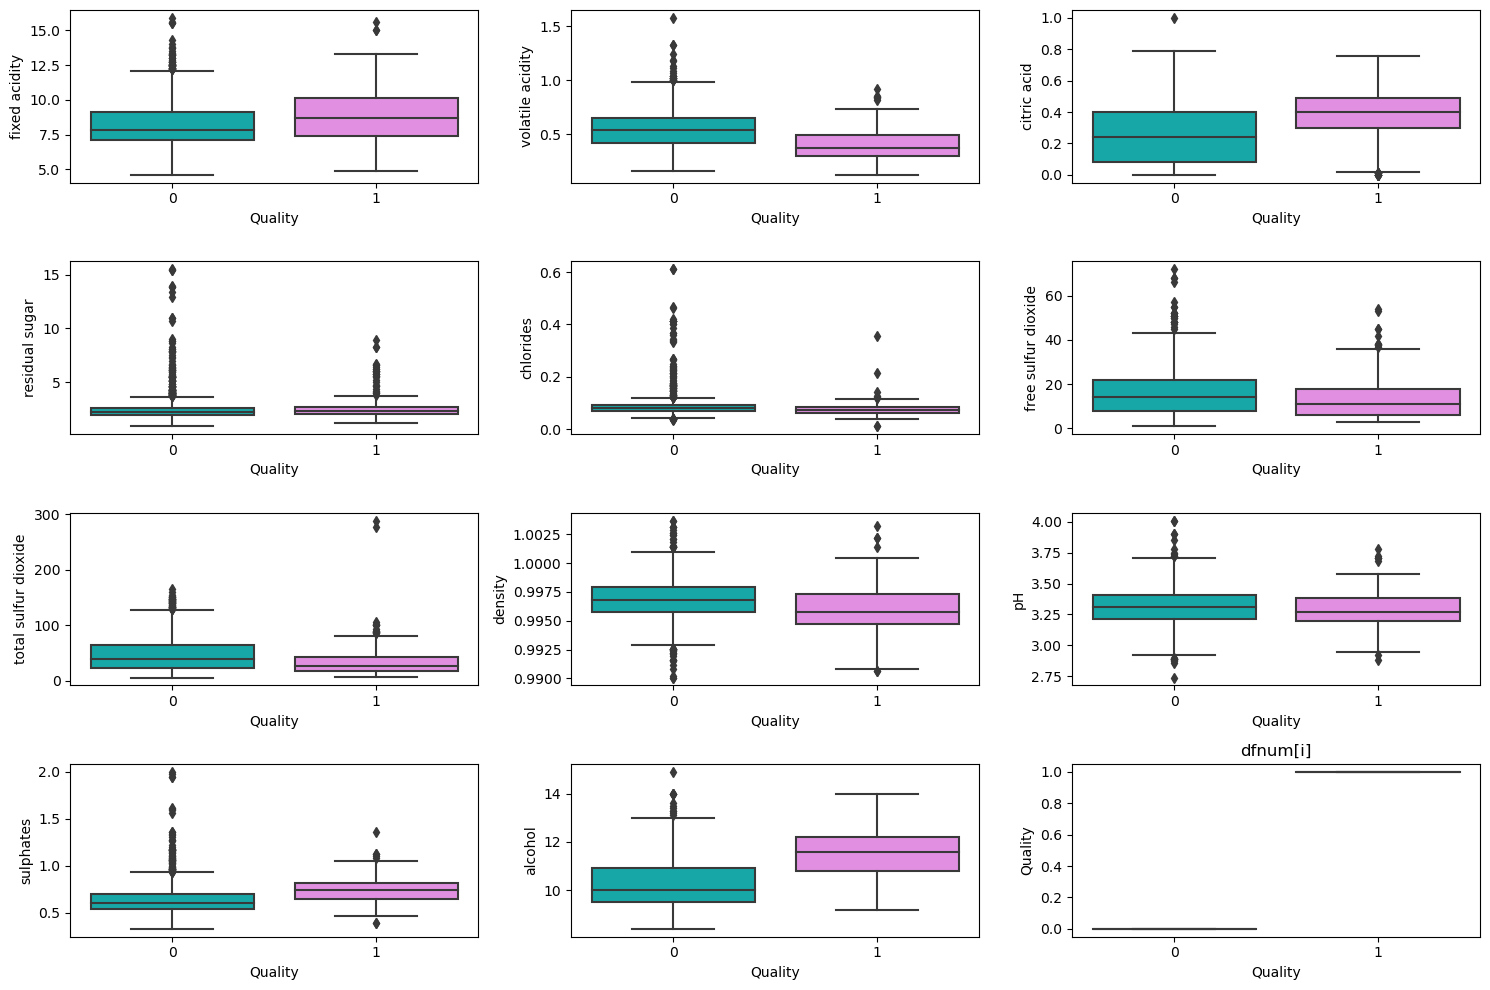

In [67]:
# Through boxplots. 

dfnum = df.select_dtypes(include=np.number)
fig,ax= plt.subplots(4,3,figsize=(15,10))
colors = ['c','violet']
for i,subplots in zip(dfnum ,ax.flatten()):
    sns.boxplot(df['Quality'], dfnum[i], ax=subplots,palette=colors)
    plt.title('dfnum[i]')
plt.tight_layout()

##### Inference :
The above boxplots show that their is difference in High quality and Low quality wine for most of the variable.  
____

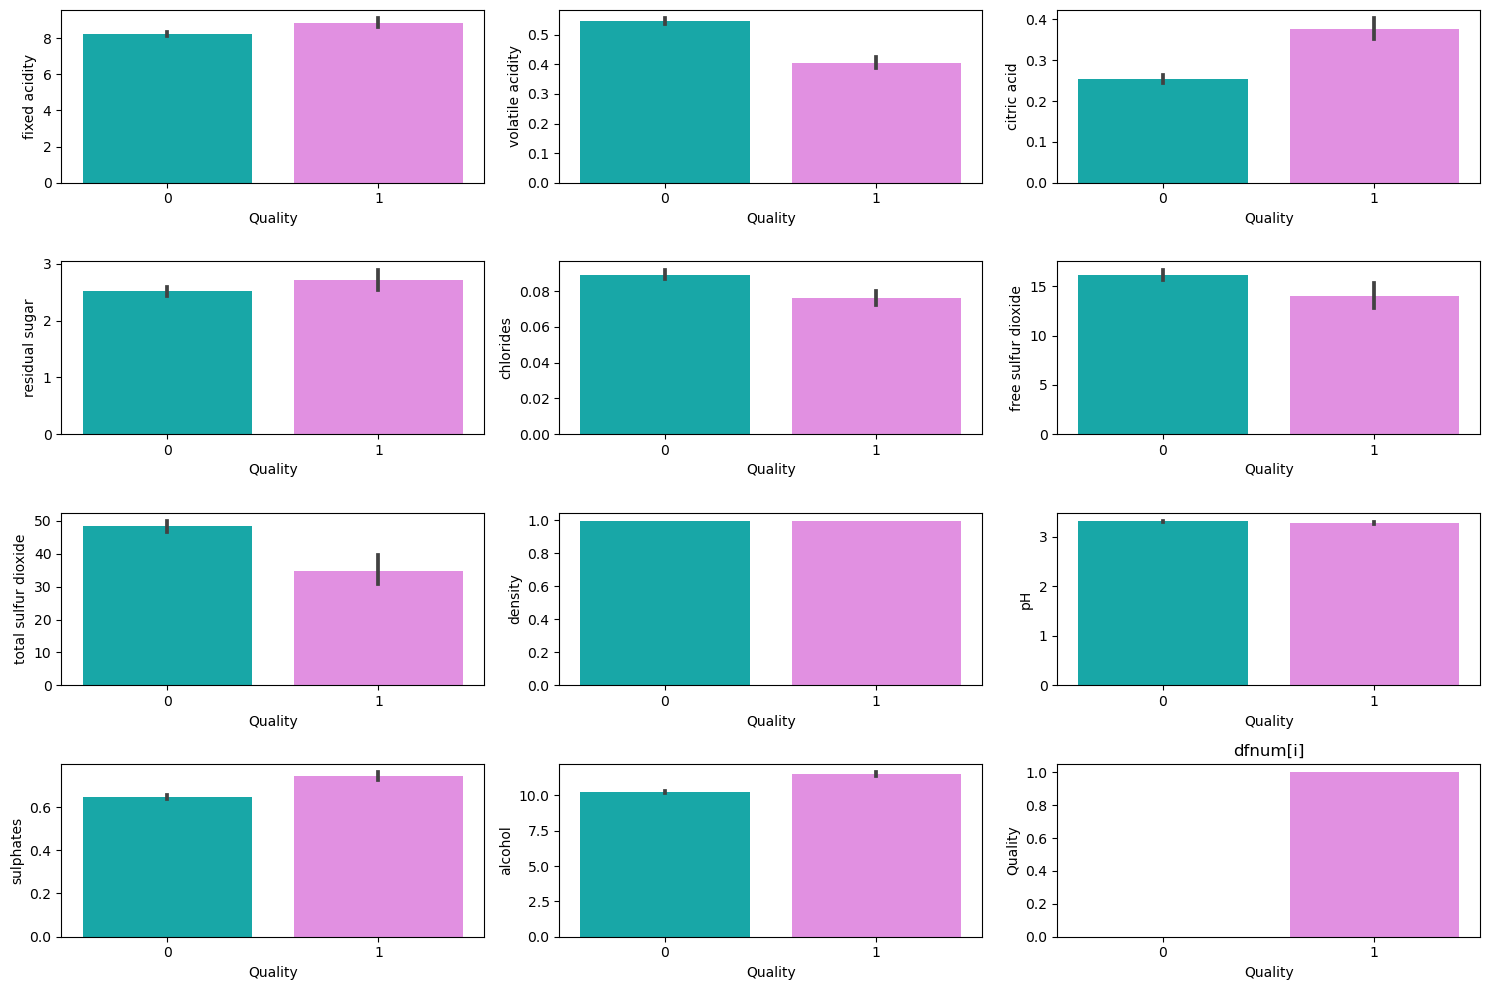

In [66]:
# Through Bar graphs

dfnum = df.select_dtypes(include=np.number)
fig,ax= plt.subplots(4,3,figsize=(15,10))
colors = ['c','violet']
for i,subplots in zip(dfnum ,ax.flatten()):
    sns.barplot(df['Quality'], dfnum[i], ax=subplots, palette=colors)
    plt.title('dfnum[i]')
plt.tight_layout()

##### Inference ;
- High quality wine has higher average **fixed acidity** than Low quality wine.
- High quality wine has lesser average **volatile acidity** than Low quality wine.
- High quality wine has higher average **citric acid** than Low quality wine.
- High quality wine has higher average **residual sugar** than Low quality wine.
- High quality wine has lesser average **chlorides** than Low quality wine.
- High quality wine has lesser average **free sulfur dioxide** than Low quality wine.
- High quality wine has lesser average **total sulfur dioxide** than Low quality wine.
- High quality wine has similar average **density** as the Low quality wine.
- High quality wine has similar average **pH** as the Low quality wine.
- High quality wine has higher average **sulphates** than Low quality wine.
- High quality wine has higher average **alcohol** than Low quality wine.

#### Probabilty distribution of each class(high=1, low=0) across each variable

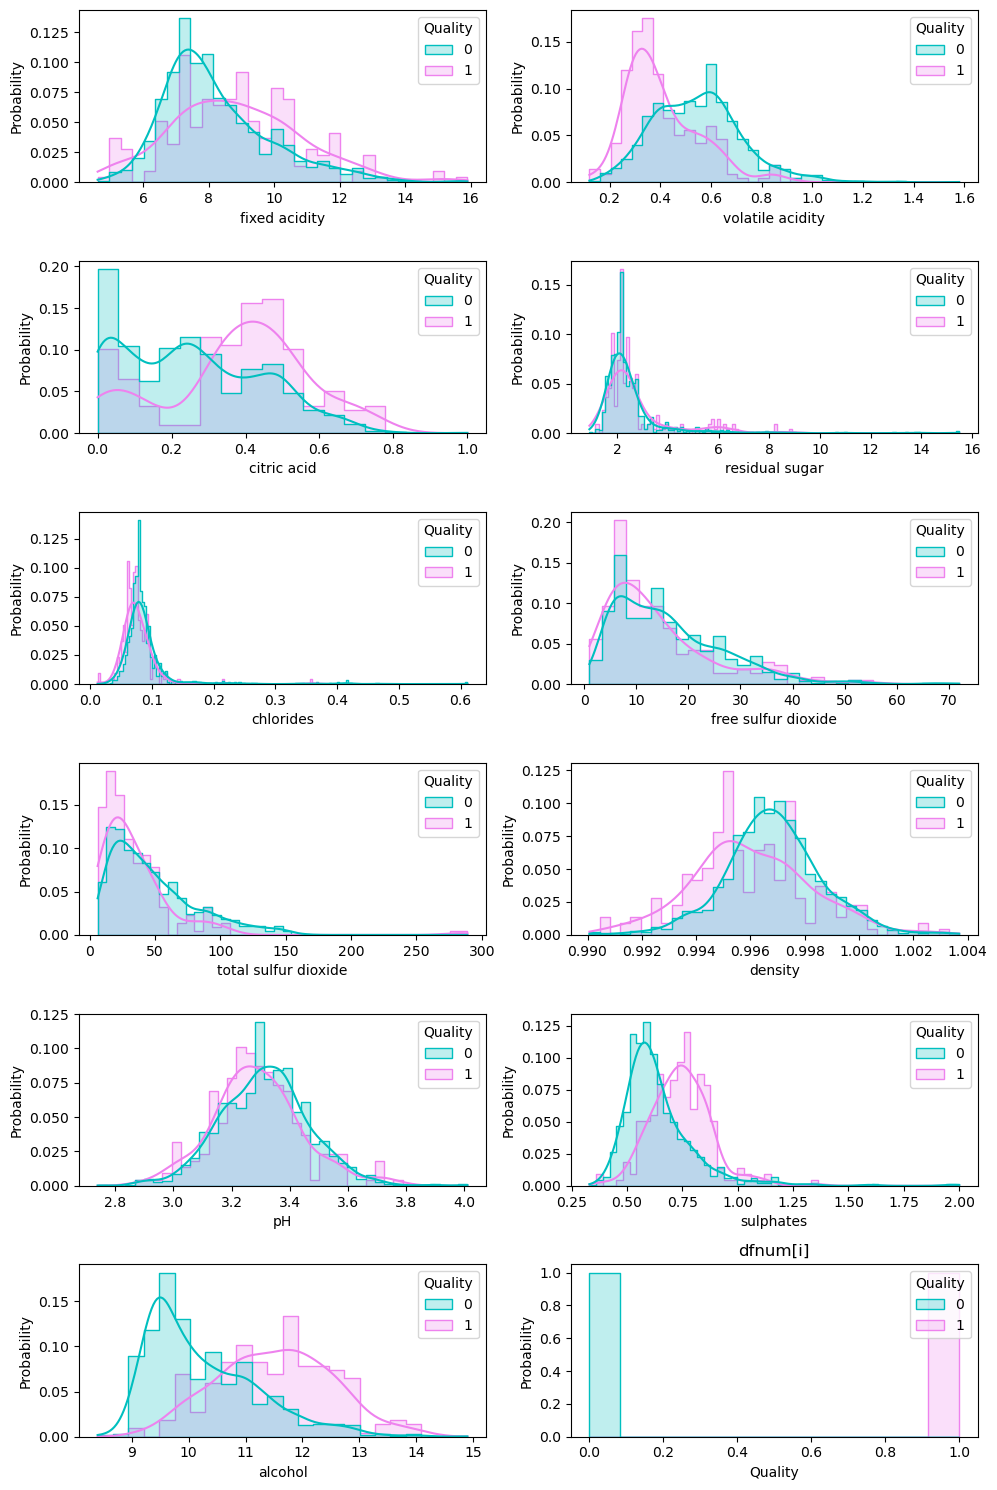

In [64]:
dfnum = df.select_dtypes(include=np.number)
fig,ax= plt.subplots(6,2,figsize=(10,15))

for i,subplots in zip(dfnum ,ax.flatten()):
    colors = ['c','violet']
    #sns.boxplot(df['Quality'], dfnum[i], ax=subplots)
    sns.histplot(df, x=dfnum[i], hue="Quality", element="step",
    stat="probability", common_norm=False, kde=True, ax=subplots, palette=colors  )
    
    plt.title('dfnum[i]')
plt.tight_layout()

##### Inference :
The above distribution plot shows for which variable there is more difference in the two subclasses of target variable. If the distribution overlaps than the two subclasses is quite similar in terms of that variable.

### Checking Classs Imbalance

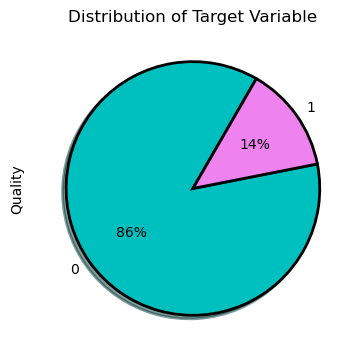

In [65]:
fig = plt.figure(figsize=(9,6))
plt.subplot(121)
df['Quality'].value_counts().plot.pie(autopct = '%1.0f%%' , colors=['c','violet'],startangle = 60, wedgeprops={"linewidth":2 , "edgecolor":"k"}, shadow=True)
plt.title("Distribution of Target Variable")
plt.show()

##### Inference :
The class of target variable is highly imbalanced. class 0 has 86% of records while class 1 only has 14% of records. To overcome this, we can apply downsampling of majority class or upsamplimg of minority class.
_______

#### The variables before Transformation

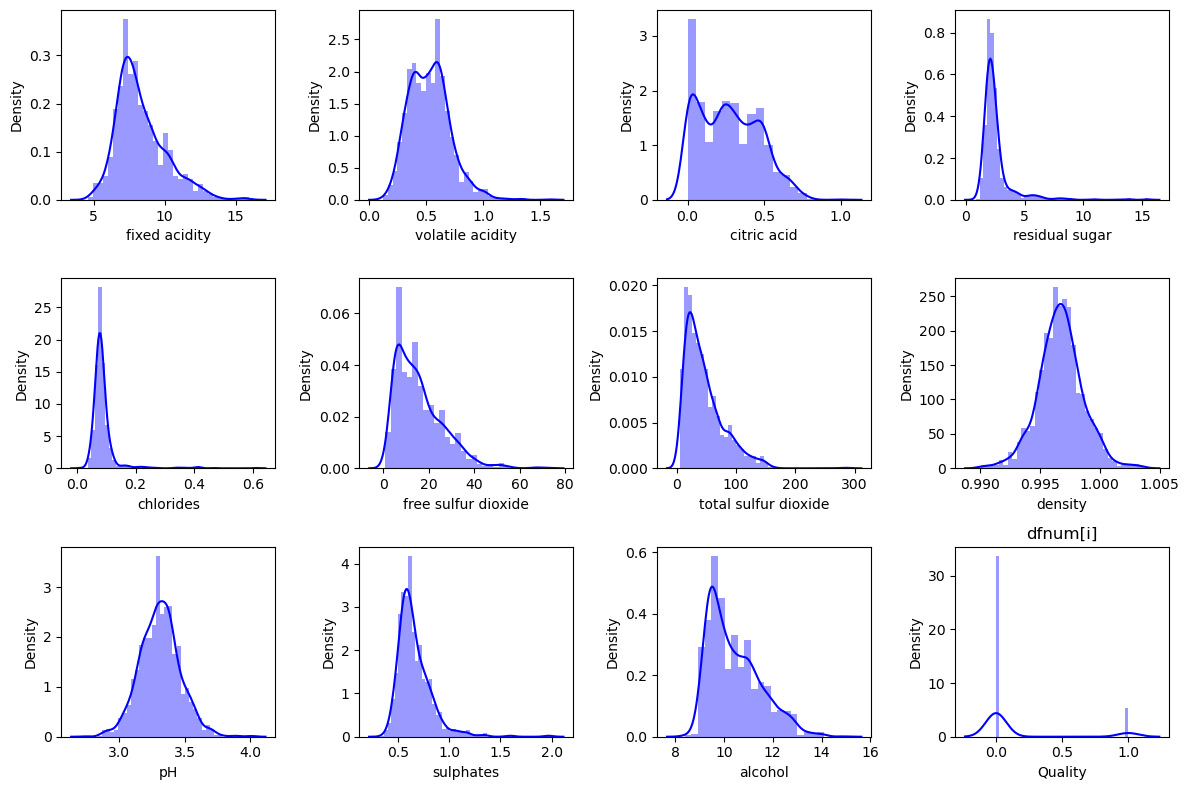

In [59]:
dfnum = df.select_dtypes(include=np.number)
fig,ax= plt.subplots(3,4,figsize=(12,8))

for i,subplots in zip(dfnum ,ax.flatten()):
    sns.distplot(dfnum[i],ax=subplots, color='b')
    plt.title('dfnum[i]')
plt.tight_layout()


In [61]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
Quality                 2.129363
dtype: float64

#### Applying Transformation to handle skewness and outliers

In [85]:
dft = df.copy()
from sklearn.preprocessing import PowerTransformer

p=PowerTransformer(method='yeo-johnson')

dft['fixed acidity']=p.fit_transform(dft[['fixed acidity']])
dft['volatile acidity']=p.fit_transform(dft[['volatile acidity']])
dft['citric acid']=p.fit_transform(dft[['citric acid']])
dft['residual sugar']=np.log(dft[['residual sugar']])

dft['chlorides']=p.fit_transform(dft[['chlorides']])
dft['free sulfur dioxide']=p.fit_transform(dft[['free sulfur dioxide']])
dft['total sulfur dioxide']=p.fit_transform(dft[['total sulfur dioxide']])
dft['density']=p.fit_transform(dft[['density']])

dft['pH']=p.fit_transform(dft[['pH']])
dft['sulphates']=p.fit_transform(dft[['sulphates']])
dft['alcohol']=p.fit_transform(dft[['alcohol']])


#### Variables after Transformation

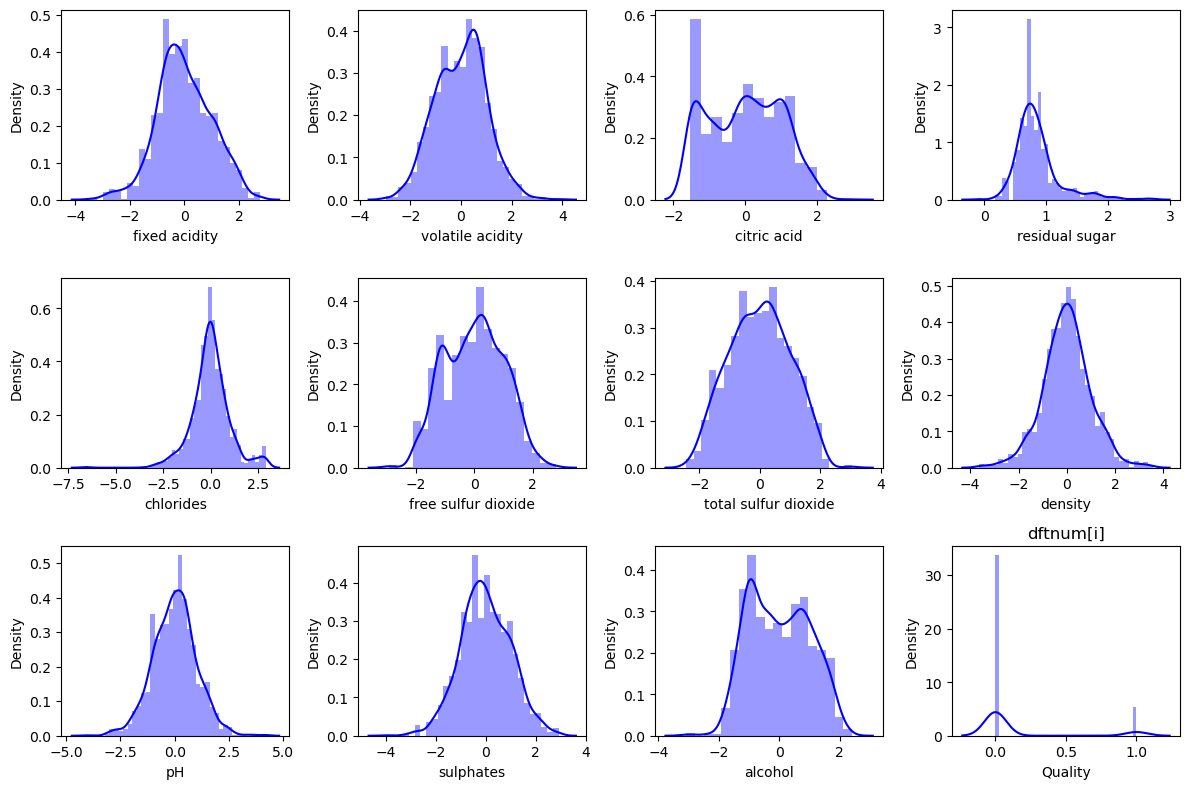

In [86]:
dftnum = dft.select_dtypes(include=np.number)
fig,ax= plt.subplots(3,4,figsize=(12,8))

for i,subplots in zip(dftnum ,ax.flatten()):
    sns.distplot(dftnum[i],ax=subplots, color='b')
    plt.title('dftnum[i]')
plt.tight_layout()


#### Checking VIF values after Transformation

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[]
for i in range(dft.shape[1]):
    vif.append(variance_inflation_factor(dft.values, i))
    
pd.DataFrame({'Variables': dft.columns, 'VIF values':vif}).sort_values(by='VIF values')

,Variables,VIF values
3,residual sugar,1.316168
9,sulphates,1.359430
4,chlorides,1.387615
11,Quality,1.547070
1,volatile acidity,1.904957
10,alcohol,2.099016
5,free sulfur dioxide,2.859187
2,citric acid,2.908192
8,pH,2.992358
6,total sulfur dioxide,3.188178


##### Inference :
Since the VIF values have decreased after transformation, we don't need to drop them. Now, none of the variable has VIF >10.
___________

### Splitting data for Training and Testing

In [109]:
from sklearn.model_selection import train_test_split

x= dft.drop('Quality', axis=1)
y= dft[['Quality']]

xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size= 0.3, random_state= 100, stratify= y)


### Building Base Model
#### 1. Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression()

base_model.fit(xtrain, ytrain)
train_pred = base_model.predict(xtrain)
base_model_pred = base_model.predict(xtest)

from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, f1_score

print('Classification Report of base model in train data:\n', classification_report(ytrain, train_pred))
print()
print('Classification Report of base model in test data:\n', classification_report(ytest, base_model_pred))
print('\nReliability of base model:', cohen_kappa_score(ytest, base_model_pred))

Classification Report of base model in train data:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       967
           1       0.62      0.37      0.46       152

    accuracy                           0.88      1119
   macro avg       0.76      0.67      0.70      1119
weighted avg       0.87      0.88      0.87      1119


Classification Report of base model in test data:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       415
           1       0.56      0.34      0.42        65

    accuracy                           0.88       480
   macro avg       0.73      0.65      0.68       480
weighted avg       0.86      0.88      0.86       480


Reliability of base model: 0.35785953177257523


##### Inference :
A simple logistic regression model is fitted. The report shows that the model is biased towards majority class since the class imbalance has not been treated. the cohen-kappa score is also very low, implying that the model is not reliable

### Applying SMOTE on Training data

In [111]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 0.5)
xtrain_re, ytrain_re = smote.fit_resample(xtrain, ytrain)

In [112]:
base_model.fit(xtrain_re, ytrain_re)
train_pred = base_model.predict(xtrain_re)
base_model_pred = base_model.predict(xtest)

from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, f1_score

print('Classification Report of base model in train data:\n', classification_report(ytrain_re, train_pred))
print()
print('Classification Report of base model in test data:\n', classification_report(ytest, base_model_pred))
print('\nReliability of base model:', cohen_kappa_score(ytest, base_model_pred))

Classification Report of base model in train data:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       967
           1       0.76      0.75      0.76       483

    accuracy                           0.84      1450
   macro avg       0.82      0.82      0.82      1450
weighted avg       0.84      0.84      0.84      1450


Classification Report of base model in test data:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       415
           1       0.48      0.71      0.58        65

    accuracy                           0.86       480
   macro avg       0.72      0.79      0.74       480
weighted avg       0.89      0.86      0.87       480


Reliability of base model: 0.49356089992242047


##### Inference :
The performance of model has significantly improved on applying SMOTE. The metric scores have improved for both training and testing set. the reliability of the model has also increased.
________

### 2. Decision Tree model with default parameter

In [118]:
from sklearn.tree import DecisionTreeClassifier

m=DecisionTreeClassifier()
m.fit(xtrain_re,ytrain_re)

pred_train = m.predict(xtrain_re)
pred_test = m.predict(xtest)


print('\033[1mTraining data report:\033[0m \n')
print(classification_report(ytrain_re, pred_train))

print()

print('\033[1mTest data report:\033[0m  \n')
print(classification_report(ytest, pred_test))
print('\nReliability of base model:', cohen_kappa_score(ytest, pred_test))

Training data report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       967
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1450
   macro avg       1.00      1.00      1.00      1450
weighted avg       1.00      1.00      1.00      1450


Test data report:  

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       415
           1       0.54      0.66      0.59        65

    accuracy                           0.88       480
   macro avg       0.74      0.79      0.76       480
weighted avg       0.89      0.88      0.88       480


Reliability of base model: 0.5216216216216216


##### Inference :
The above model is in overfit state. To prevent overfitting in decision tree we can apply random forest algorithm.
____

In [119]:
dfeat = pd.DataFrame()
dfeat['Variable'] = xtrain_re.columns
dfeat['Importance'] = m.feature_importances_
tempdf = dfeat.sort_values(by= 'Importance', ascending= False)
tempdf

,Variable,Importance
9,sulphates,0.304292
10,alcohol,0.178027
1,volatile acidity,0.100656
6,total sulfur dioxide,0.074535
8,pH,0.070435
5,free sulfur dioxide,0.065363
2,citric acid,0.051698
4,chlorides,0.048731
0,fixed acidity,0.045779
7,density,0.045049


<AxesSubplot:xlabel='Importance', ylabel='Variable'>

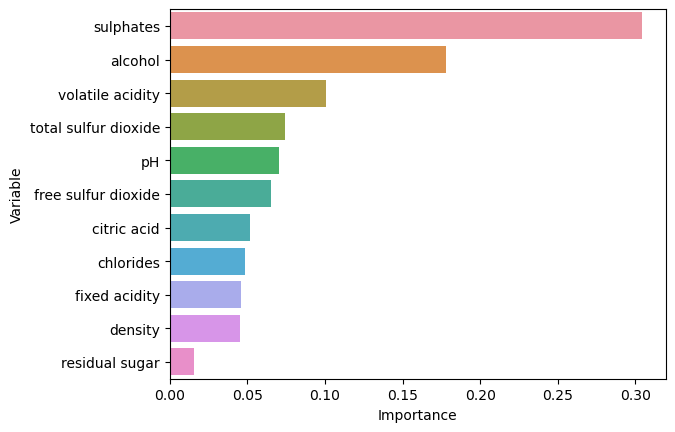

In [120]:
sns.barplot(tempdf['Importance'], tempdf['Variable'])

### 3. RandomForest model with default parameters

In [117]:
from sklearn.ensemble import RandomForestClassifier

m=RandomForestClassifier(random_state=10)
m.fit(xtrain_re,ytrain_re)

pred_train = m.predict(xtrain_re)
pred_test = m.predict(xtest)


print('\033[1mTraining data report:\033[0m \n')
print(classification_report(ytrain_re, pred_train))

print()

print('\033[1mTest data report:\033[0m  \n')
print(classification_report(ytest, pred_test))
print('\nReliability of base model:', cohen_kappa_score(ytest, pred_test))

Training data report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       967
           1       1.00      1.00      1.00       483

    accuracy                           1.00      1450
   macro avg       1.00      1.00      1.00      1450
weighted avg       1.00      1.00      1.00      1450


Test data report:  

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       415
           1       0.72      0.66      0.69        65

    accuracy                           0.92       480
   macro avg       0.83      0.81      0.82       480
weighted avg       0.92      0.92      0.92       480


Reliability of base model: 0.6413793103448275


##### Inference :
The randomforest model with default parameter resulted in overfit state. We can try tuning its parameter to improve the performance.
____

### 4. RandomForest with parameter tuning

In [136]:
from sklearn.ensemble import RandomForestClassifier

m=RandomForestClassifier(random_state=10, n_estimators=50, max_depth=6)
m.fit(xtrain_re,ytrain_re)

pred_train = m.predict(xtrain_re)
pred_test = m.predict(xtest)


print('\033[1mTraining data report:\033[0m \n')
print(classification_report(ytrain_re, pred_train))

print()

print('\033[1mTest data report:\033[0m  \n')
print(classification_report(ytest, pred_test))
print('\nReliability of base model:', cohen_kappa_score(ytest, pred_test))

Training data report: 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       967
           1       0.91      0.88      0.89       483

    accuracy                           0.93      1450
   macro avg       0.93      0.92      0.92      1450
weighted avg       0.93      0.93      0.93      1450


Test data report:  

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       415
           1       0.62      0.71      0.66        65

    accuracy                           0.90       480
   macro avg       0.79      0.82      0.80       480
weighted avg       0.91      0.90      0.90       480


Reliability of base model: 0.6049036777583188


##### Inference :
RandomForest model with hyperparameter tuning improved the performance. The model is not in overfit state and the cohen-kappa score has also increased.

### 5. KNN Model

In [146]:
from sklearn.neighbors import KNeighborsClassifier

m=KNeighborsClassifier(n_neighbors= 15)
m.fit(xtrain_re,ytrain_re)

pred_train = m.predict(xtrain_re)
pred_test = m.predict(xtest)


print('\033[1mTraining data report:\033[0m \n')
print(classification_report(ytrain_re, pred_train))

print()

print('\033[1mTest data report:\033[0m  \n')
print(classification_report(ytest, pred_test))
print('\nReliability of base model:', cohen_kappa_score(ytest, pred_test))

Training data report: 

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       967
           1       0.75      0.93      0.83       483

    accuracy                           0.87      1450
   macro avg       0.86      0.89      0.87      1450
weighted avg       0.89      0.87      0.88      1450


Test data report:  

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       415
           1       0.45      0.78      0.57        65

    accuracy                           0.84       480
   macro avg       0.70      0.82      0.74       480
weighted avg       0.89      0.84      0.86       480


Reliability of base model: 0.48016877637130806


##### Inference :
The KNN model is not in overfit state. The metric scores are fine but not better than RF model.

### 6. NaiveBayes Model

In [149]:
from sklearn.naive_bayes import GaussianNB

m=GaussianNB()
m.fit(xtrain_re,ytrain_re)

pred_train = m.predict(xtrain_re)
pred_test = m.predict(xtest)


print('\033[1mTraining data report:\033[0m \n')
print(classification_report(ytrain_re, pred_train))

print()

print('\033[1mTest data report:\033[0m  \n')
print(classification_report(ytest, pred_test))
print('\nReliability of base model:', cohen_kappa_score(ytest, pred_test))

Training data report: 

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       967
           1       0.68      0.74      0.71       483

    accuracy                           0.80      1450
   macro avg       0.77      0.78      0.78      1450
weighted avg       0.80      0.80      0.80      1450


Test data report:  

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       415
           1       0.41      0.75      0.53        65

    accuracy                           0.82       480
   macro avg       0.68      0.79      0.71       480
weighted avg       0.88      0.82      0.84       480


Reliability of base model: 0.42950819672131146


##### Inference :
The Naive-Bayes model is not in overfit state. The metric scores are fine but not better than RF model.

### 7. Ensembling method : Adaboost

In [150]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

m=AdaBoostClassifier()
m.fit(xtrain,ytrain)

pred_train = m.predict(xtrain_re)
pred_test = m.predict(xtest)


print('\033[1mTraining data report:\033[0m \n')
print(classification_report(ytrain_re, pred_train))

print()

print('\033[1mTest data report:\033[0m  \n')
print(classification_report(ytest, pred_test))
print('\nReliability of base model:', cohen_kappa_score(ytest, pred_test))

Training data report: 

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       967
           1       0.91      0.57      0.70       483

    accuracy                           0.84      1450
   macro avg       0.87      0.77      0.80      1450
weighted avg       0.85      0.84      0.83      1450


Test data report:  

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       415
           1       0.60      0.49      0.54        65

    accuracy                           0.89       480
   macro avg       0.76      0.72      0.74       480
weighted avg       0.88      0.89      0.88       480


Reliability of base model: 0.4789949748743718


##### Inference :
The Adaptive boost model is not in overfit state. The metric scores are fine but not better than RF model.

### 8. Gradient Boost

In [151]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

m=GradientBoostingClassifier()
m.fit(xtrain,ytrain)

pred_train = m.predict(xtrain_re)
pred_test = m.predict(xtest)


print('\033[1mTraining data report:\033[0m \n')
print(classification_report(ytrain_re, pred_train))

print()

print('\033[1mTest data report:\033[0m  \n')
print(classification_report(ytest, pred_test))
print('\nReliability of base model:', cohen_kappa_score(ytest, pred_test))

Training data report: 

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       967
           1       0.99      0.70      0.82       483

    accuracy                           0.90      1450
   macro avg       0.93      0.85      0.88      1450
weighted avg       0.91      0.90      0.89      1450


Test data report:  

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       415
           1       0.63      0.48      0.54        65

    accuracy                           0.89       480
   macro avg       0.78      0.72      0.74       480
weighted avg       0.88      0.89      0.89       480


Reliability of base model: 0.48376421923474666


##### Inference :
The gradient boost model is in overfit state as the training and test score have significant difference in them.

### 9. XGBoost

In [152]:
from xgboost import XGBClassifier

m=XGBClassifier(random_state=10)
m.fit(xtrain,ytrain)

pred_train = m.predict(xtrain_re)
pred_test = m.predict(xtest)


print('\033[1mTraining data report:\033[0m \n')
print(classification_report(ytrain_re, pred_train))

print()

print('\033[1mTest data report:\033[0m  \n')
print(classification_report(ytest, pred_test))
print('\nReliability of base model:', cohen_kappa_score(ytest, pred_test))

Training data report: 

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       967
           1       1.00      0.86      0.92       483

    accuracy                           0.95      1450
   macro avg       0.97      0.93      0.95      1450
weighted avg       0.96      0.95      0.95      1450


Test data report:  

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       415
           1       0.72      0.60      0.66        65

    accuracy                           0.91       480
   macro avg       0.83      0.78      0.80       480
weighted avg       0.91      0.91      0.91       480


Reliability of base model: 0.607185628742515


##### Inference :
The XGBoost model is in overfit state.

### 10. Stacking Classifier

In [153]:
from sklearn.ensemble import StackingClassifier
m=StackingClassifier([('rf',RandomForestClassifier(n_estimators=50)),('gbc',GradientBoostingClassifier(n_estimators=15))])
m.fit(xtrain,ytrain)

pred_train = m.predict(xtrain_re)
pred_test = m.predict(xtest)


print('\033[1mTraining data report:\033[0m \n')
print(classification_report(ytrain_re, pred_train))

print()

print('\033[1mTest data report:\033[0m  \n')
print(classification_report(ytest, pred_test))
print('\nReliability of base model:', cohen_kappa_score(ytest, pred_test))

Training data report: 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       967
           1       1.00      0.75      0.86       483

    accuracy                           0.92      1450
   macro avg       0.94      0.87      0.90      1450
weighted avg       0.93      0.92      0.91      1450


Test data report:  

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       415
           1       0.82      0.51      0.63        65

    accuracy                           0.92       480
   macro avg       0.88      0.75      0.79       480
weighted avg       0.91      0.92      0.91       480


Reliability of base model: 0.5858407079646017


##### Inference :
The above model is not in overfit state. The metric scores are good

### Comprehensive table to represent performance of each model

In [154]:
mdic = { 'Model': ['Logistic Regression', 'RandomForest Tuned', 'K-Nearest-Neibors', 'Naive-Bayes',
                   'Ada-Boost','Gradient Boost', 'XGBoost','Stacking classifier'],
        
         'F1_score':[0.74, 0.80, 0.74, 0.71, 0.74, 0.74, 0.80, 0.79],
          'Precision_score': [0.72, 0.79, 0.70, 0.68, 0.76, 0.78, 0.83, 0.88],
          'Cohen-kappa score': [0.493, 0.650, 0.480, 0.42, 0.478, 0.480, 0.607, 0.580]}
model_df = pd.DataFrame(mdic)
model_df.sort_values(by='F1_score', ascending=False)

,Model,F1_score,Precision_score,Cohen-kappa score
1,RandomForest Tuned,0.80,0.79,0.650
6,XGBoost,0.80,0.83,0.607
7,Stacking classifier,0.79,0.88,0.580
0,Logistic Regression,0.74,0.72,0.493
2,K-Nearest-Neibors,0.74,0.70,0.480
4,Ada-Boost,0.74,0.76,0.478
5,Gradient Boost,0.74,0.78,0.480
3,Naive-Bayes,0.71,0.68,0.420


### Conclusion and Summary

- **Predictive models are developed for wine quality prediction, taking into consideration the presence of class imbalance. The target variable comprised two subclasses: high-quality and low-quality wine. To address the class imbalance, the SMOTE (Synthetic Minority Over-sampling Technique) algorithm was employed. Among the various models built, the Random Forest algorithm exhibited superior performance in terms of precision, F1 score, and Cohen's kappa score.**


- **Precision is a metric that measures the proportion of correctly predicted positive instances out of all instances predicted as positive. In the context of wine quality prediction, precision indicates the accuracy of identifying high-quality wines correctly. F1 score, on the other hand, considers both precision and recall (which measures the proportion of actual positives correctly predicted) and provides a balanced measure of model performance. Cohen's kappa score assesses the level of agreement between predicted and actual classes, considering the possibility of agreement occurring by chance. A high kappa score signifies a strong agreement beyond random chance, indicating the reliability of the model.**


- **These metrics are crucial in evaluating the performance of predictive models for wine quality prediction. High precision and F1 score suggest that the model excels in correctly identifying high-quality wines, minimizing false positives. Moreover, a high Cohen's kappa score indicates a strong agreement between predicted and actual classes, affirming the model's reliability.**